In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('diabetes.csv')


In [9]:
df.head(768)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
#Aim : to predict weather diabetes have or not


In [11]:
df.shape


(768, 9)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.isnull()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


 # Train and Test

In [15]:
%pip install scikit-learn


In [16]:
from sklearn.model_selection import train_test_split #data #label


In [17]:
x = df.iloc[:,df.columns!='Outcome'] #data
y = df.iloc[:,df.columns=='Outcome'] #outcome or Label


In [18]:
print(x)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [19]:
print(y)


     Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]


In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2) #20%test


In [21]:
xtrain.shape


(614, 8)

In [22]:
xtrain.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
352,3,61,82,28,0,34.4,0.243,46
41,7,133,84,0,0,40.2,0.696,37
144,4,154,62,31,284,32.8,0.237,23
137,0,93,60,25,92,28.7,0.532,22
535,4,132,0,0,0,32.9,0.302,23


In [23]:
ytrain.head()


,Outcome
352,0
41,0
144,0
137,0
535,1


 # Algorithm - RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier


In [25]:
model=RandomForestClassifier()


In [26]:
model.fit(xtrain,ytrain.values.ravel()) #to train the alg


RandomForestClassifier()

In [27]:
predict_output = model.predict(xtest) #to test the alg
print(predict_output)


[0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0
 1 0 1 0 0 1]


In [28]:
from sklearn.metrics import accuracy_score


In [29]:
acc=accuracy_score(predict_output,ytest)
print('The accuracy score for RF:',acc)


The accuracy score for RF: 0.7532467532467533


 # Algorithm - Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression


In [31]:
model=LogisticRegression()


In [32]:
model.fit(xtrain,ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predictions=model.predict(xtest)
accuracy=accuracy_score(ytest,predictions)


In [34]:
print("Accuracy:", accuracy)


Accuracy: 0.7662337662337663


 # Algorithm - Support Vector Machine

In [35]:
from sklearn.svm import SVC

In [36]:
model = SVC()

model.fit(xtrain, ytrain)

svm_pred = model.predict(xtest)

svmacc = accuracy_score(ytest, svm_pred)
print("Accuracy:", svmacc)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7532467532467533


 # Algorithm - Decision Trees

In [37]:
from sklearn.tree import DecisionTreeClassifier
mod=DecisionTreeClassifier()
mod.fit(xtrain,ytrain)
dtmpred=mod.predict(xtest)
dtmacc=accuracy_score(ytest,dtmpred)
print("The Accuracy is ",dtmacc)


The Accuracy is  0.6948051948051948


 # Algorithm - ADA Boost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
modd=AdaBoostClassifier()
modd.fit(xtrain,ytrain)
adapred=mod.predict(xtest)
adaacc=accuracy_score(ytest,adapred)
print("The Accuracy is ",adaacc)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Accuracy is  0.6948051948051948


 # Visualization

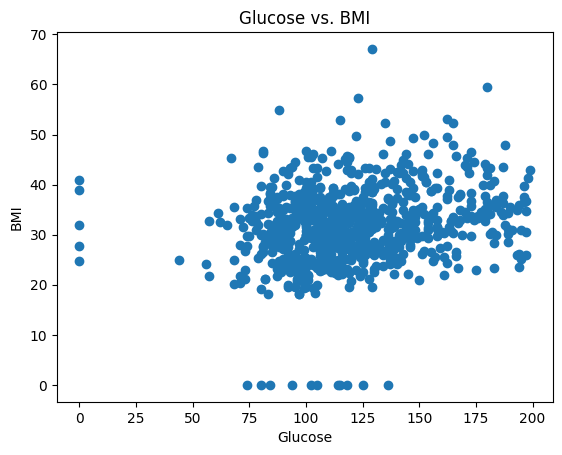

In [39]:
# Scatter plot of Glucose vs. BMI
plt.scatter(df['Glucose'], df['BMI'])
plt.title('Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()


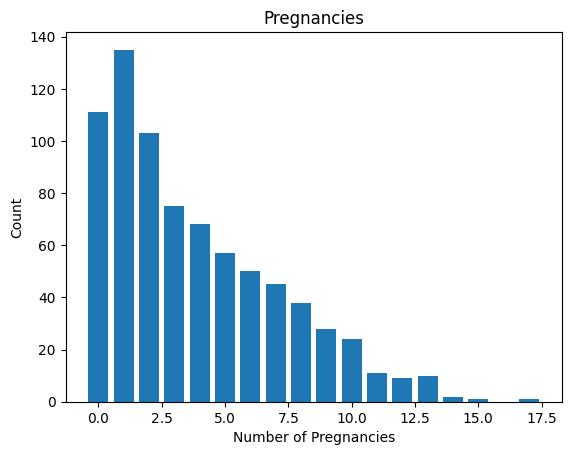

In [40]:
# Bar chart of Pregnancies
pregnancies_counts = df['Pregnancies'].value_counts().sort_index()
plt.bar(pregnancies_counts.index, pregnancies_counts.values)
plt.title('Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.show()


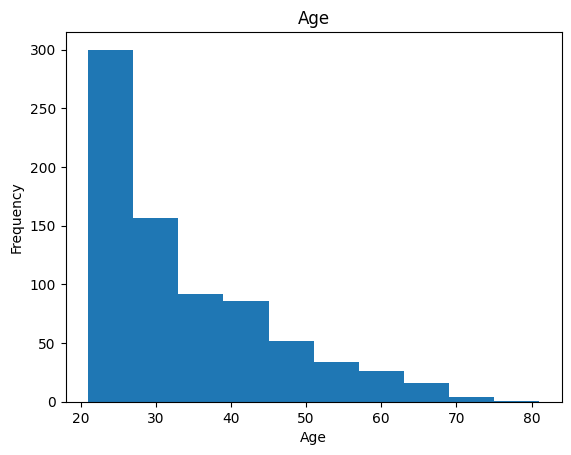

In [41]:
# Histogram of Age
plt.hist(df['Age'], bins=10)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


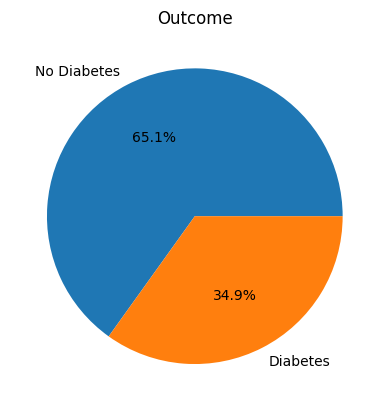

In [42]:
# Pie chart of Outcome
outcome_counts = df['Outcome'].value_counts()
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%')
plt.title('Outcome')
plt.show()


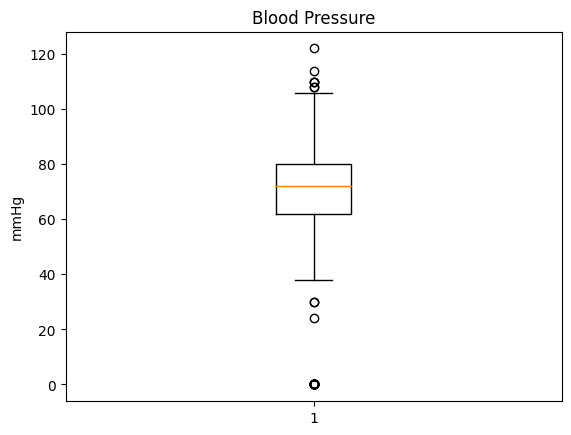

In [43]:
# Box plot of Blood Pressure
plt.boxplot(df['BloodPressure'])
plt.title('Blood Pressure')
plt.ylabel('mmHg')
plt.show()


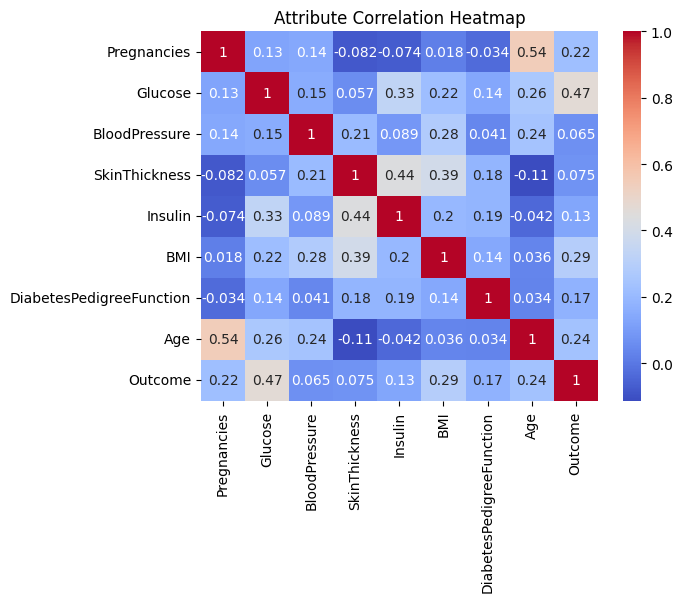

In [44]:
import seaborn as sns
# Calculate correlation matrix
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Attribute Correlation Heatmap')
plt.show()



 # Accuracy Visualization

<ipython-input-45-436254b9eef5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=['Random Forest Classifier', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree Classifier', 'ADA Boost'], palette='Blues')


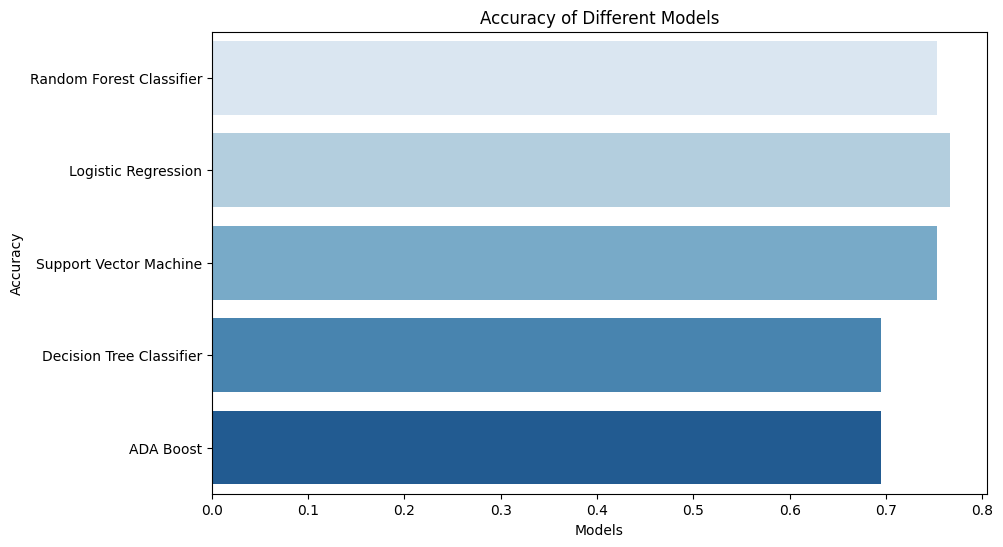

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
accuracies = [acc, accuracy, svmacc, dtmacc, adaacc]
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=['Random Forest Classifier', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree Classifier', 'ADA Boost'], palette='Blues')
plt.title("Accuracy of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()


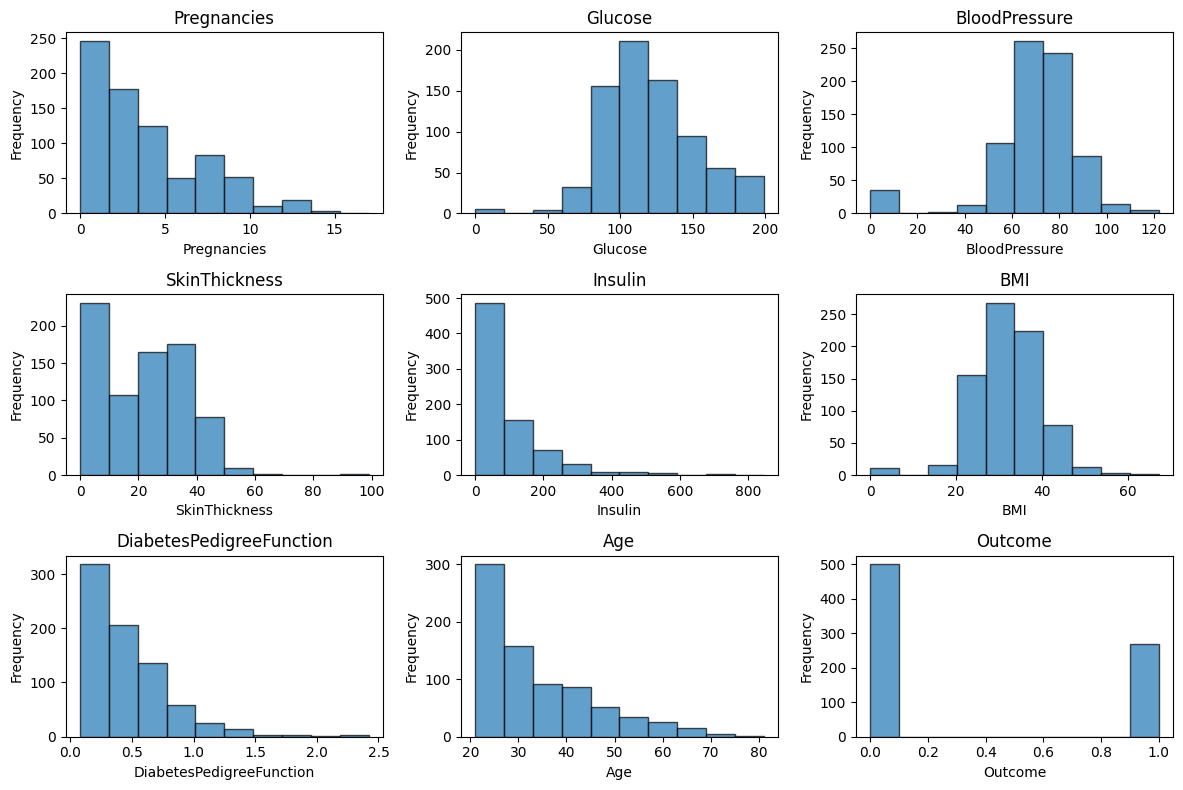

In [47]:
#Histogram for dataset
num_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
for i, column in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[column], bins=10, edgecolor='k', alpha=0.7)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()